<a href="https://colab.research.google.com/github/filippeviana/ci-ncia-de-dados/blob/main/ci%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1 CRISP - DM: Entendimento do negócio
Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos.

Este é um problema de concessão de cartões de crédito, publicado no Kaggle, uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está aqui.

Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

Objetivos do negócio Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
Objetivos da modelagem O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

# Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

Dicionário de dados
Os dados estão dispostos em uma tabela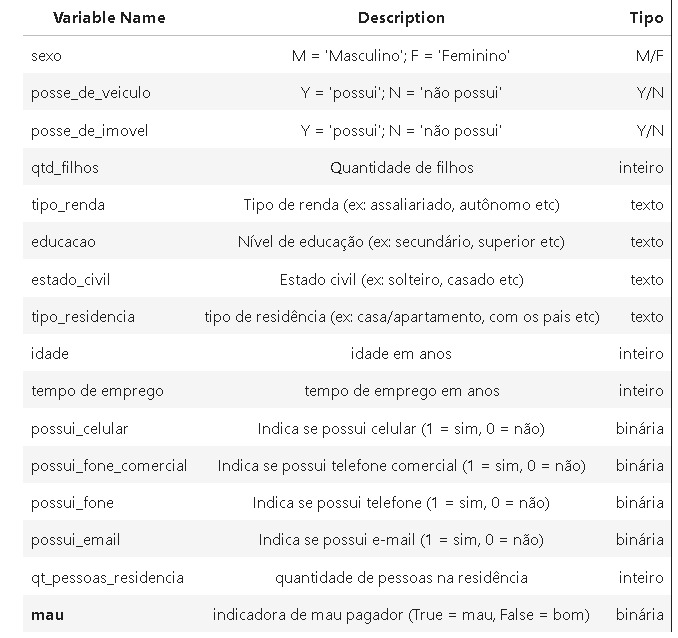 com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np



from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [ ]:
display(df['mau'].value_counts())
display("taxa de inadimplentes")
display(df['mau'].mean())

,count
mau,
False,16260
True,390


'taxa de inadimplentes'

0.023423423423423424

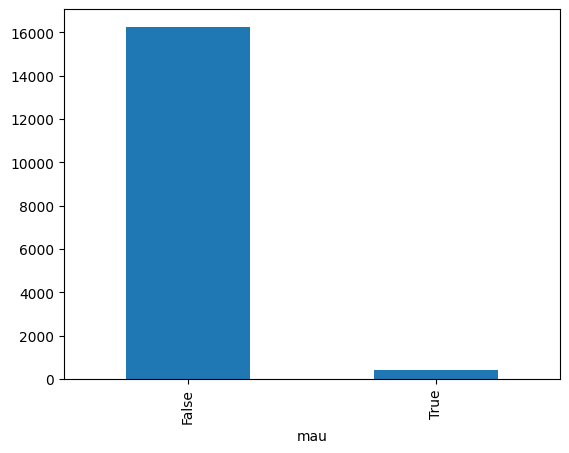

In [ ]:
mau = 'mau'
barras = df[mau].value_counts().plot.bar()

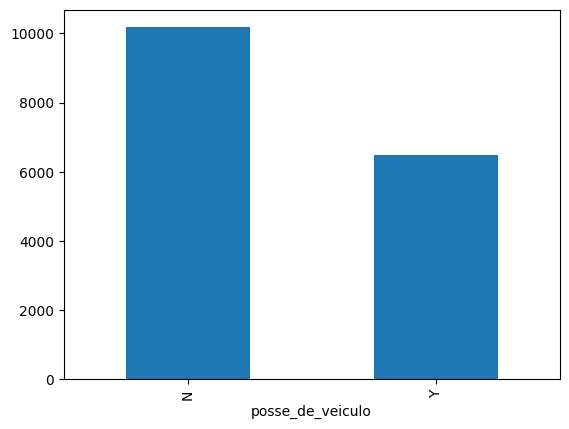

In [ ]:
veiculo = 'posse_de_veiculo'
barras_veiculo = df[veiculo].value_counts().plot.bar()

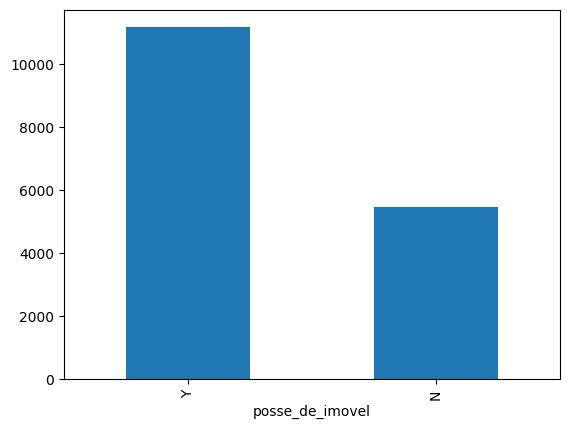

In [ ]:
imovel ='posse_de_imovel'
barras_imovel = df[imovel].value_counts().plot.bar()

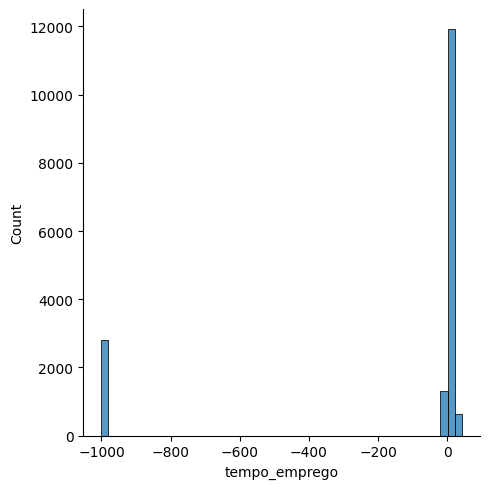

In [ ]:
emprego='tempo_emprego'
fig = sns.displot(df,x= emprego , bins = 50)

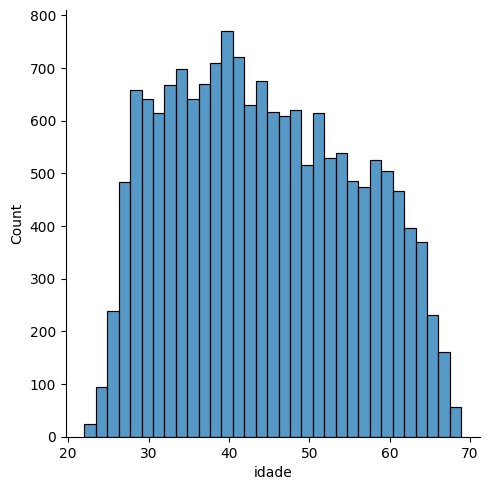

In [ ]:
idade = 'idade'
sns.displot(data = df, x = idade)

<ipython-input-9-76ce1b43b585>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


Text(0, 0.5, 'Proporção de inadimplentes')

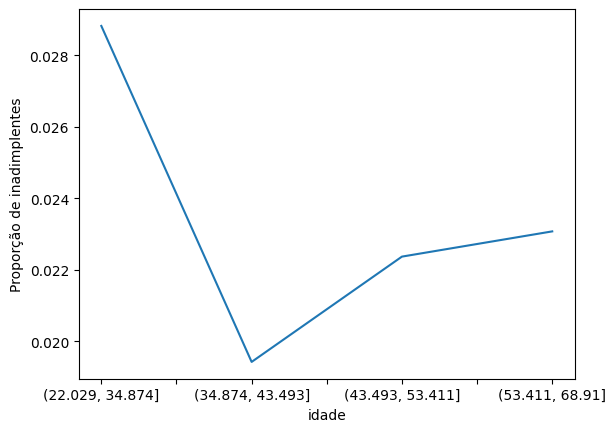

In [ ]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")

<ipython-input-10-8ac7776899d8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr= df.groupby(cat_srs)


Text(0, 0.5, 'Proporção inadimplencia')

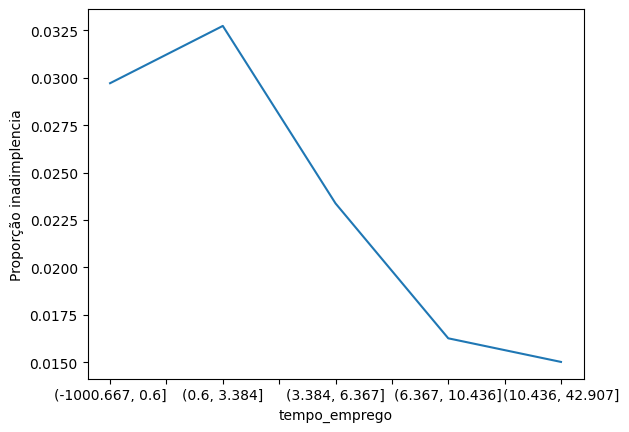

In [ ]:
cat_srs, bins = pd.qcut(df[emprego],q=5, retbins=True)
gr= df.groupby(cat_srs)
bivari = gr['mau'].mean()

m= bivari.plot.line()
m.set_ylabel("Proporção inadimplencia")

# **Essa analise bivariada mostra que pessoas que ficam de 2 a 6 meses empregadas tem uma chance maior de se tornarem inadimplentes. Com maior estabilidade no emprego o nivel de inadimplencia diminui  **

# Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

seleção Neste caso, os dados já estão pré-selecionados
limpeza Precisaremos identificar e tratar dados faltantes
construção Neste primeiro exercício não faremos construção de novas variáveis
integração Temos apenas uma fonte de dados, não é necessário agregação
formatação Os dados já se encontram em formatos úteis

In [ ]:
data = pd.DataFrame(df.dtypes, columns=['tipo'])

data['n_categorias'] = 0

for var in data.index:
    data.loc[var, 'n_categorias']= len(df.groupby([var]).size())
data

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [ ]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [ ]:
for var in data[data['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [ ]:
display(df)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,False,True,False,False,False,False,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,False,False,False,False,False,False,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False


# Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:

**1** Selecionar a técnica de modelagem Utilizaremos a técnica de floresta aleatória (random forest), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.

**2** Desenho do teste Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada treinamento, onde o algoritmo 'aprende', e outra chamada teste, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.

**3** Avaliação do modelo Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (AtrasoRelevante2anos).

In [ ]:
x =df.drop('mau',axis =1)
y = df['mau']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
15011,0,43.827397,20.112329,1,1,1,0,2.0,True,False,...,False,False,False,False,False,False,False,False,False,False
14297,0,33.693151,3.287671,1,0,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
10270,0,57.621918,4.550685,1,0,0,1,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
9096,0,45.734247,18.295890,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1686,0,57.567123,-1000.665753,1,0,0,0,1.0,False,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11312,1,29.630137,7.687671,1,0,0,0,3.0,True,False,...,False,False,False,False,False,False,False,False,False,False
13912,2,30.742466,11.627397,1,1,1,0,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
9908,0,40.487671,9.101370,1,0,0,0,1.0,True,False,...,False,False,False,True,False,False,False,False,False,False
179,0,55.178082,-1000.665753,1,0,1,1,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# treinado uma random forest com 5 árvores
clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [ ]:
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('acurácia:{0: .2f} %'.format(acc*100))

acurácia: 97.45 %


In [ ]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('acurácia:{0: .2f} %'.format(acc*98))

acurácia: 95.55 %


In [ ]:
tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab.iloc[1, 0] / (tab.iloc[1, 0] + tab.iloc[0, 0]))
print(tab.iloc[1, 1] / (tab.iloc[1, 1] + tab.iloc[0, 1]))
tab

0.007371007371007371
0.20430107526881722


mau,False,True
row_0,,
False,4040,74
True,30,19
